In [1]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import AllChem

## [Substructure Searching](https://www.rdkit.org/docs/GettingStartedInPython.html#substructure-searching)

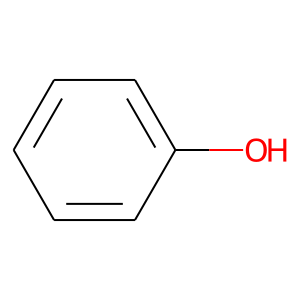

In [2]:
from rdkit.Chem import AllChem as Chem
m = Chem.MolFromSmiles("c1ccccc1O")
Draw.MolToImage(m)

In [3]:
patt = Chem.MolFromSmarts("ccO")
m.HasSubstructMatch(patt)

True

In [4]:
m.GetSubstructMatch(patt)

(0, 5, 6)

In [5]:
m.GetSubstructMatches(patt)

((0, 5, 6), (4, 5, 6))

## [Chemical Transformations](https://www.rdkit.org/docs/GettingStartedInPython.html#chemical-transformations)

### [Substructure-based transformations](https://www.rdkit.org/docs/GettingStartedInPython.html#substructure-based-transformations)

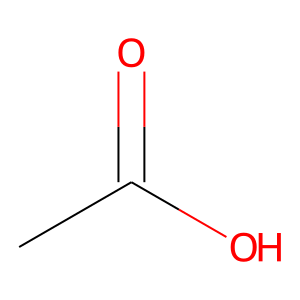

In [6]:
m2 = Chem.MolFromSmiles("CC(=O)O")
Draw.MolToImage(m2)

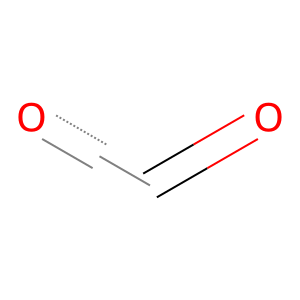

In [7]:
patt2 = Chem.MolFromSmarts("C(=O)[OH]")
Draw.MolToImage(patt2)


In [8]:
rm = AllChem.DeleteSubstructs(m2, patt2)
Chem.MolToSmiles(rm)

'C'

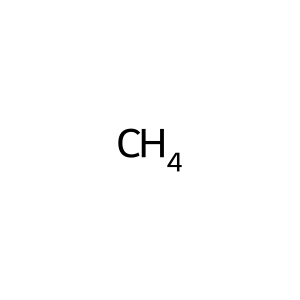

In [9]:
Draw.MolToImage(rm)

In [10]:
repl3 = Chem.MolFromSmiles("OC")
patt3 = Chem.MolFromSmarts("[$(NC(=O))]")
m3 = Chem.MolFromSmiles("CC(=O)N")
rms = AllChem.ReplaceSubstructs(m3, patt3, repl3)
Chem.MolToSmiles(rms[0])


'COC(C)=O'

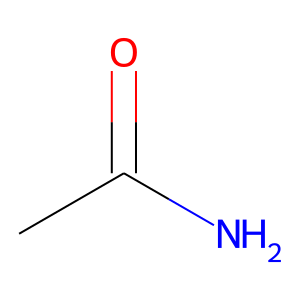

In [11]:
Draw.MolToImage(m3)

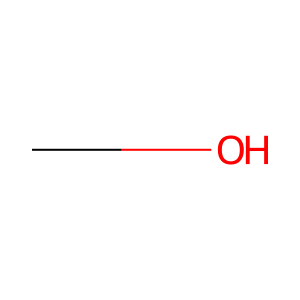

In [12]:
Draw.MolToImage(repl3)

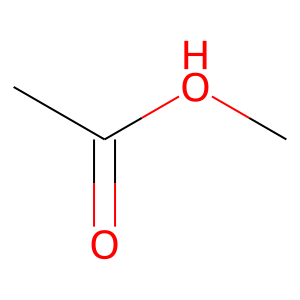

In [13]:
Draw.MolToImage(rms[0])

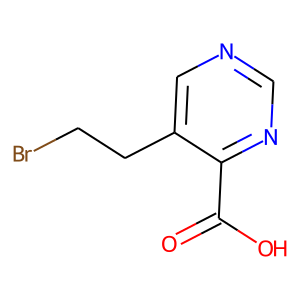

In [14]:
m4 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
no_side_chains = Chem.ReplaceSidechains(m4,core)
Draw.MolToImage(m4)

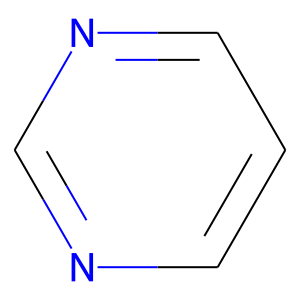

In [15]:
Draw.MolToImage(core)

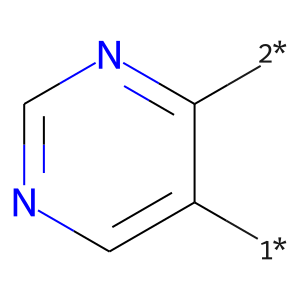

In [16]:
Draw.MolToImage(no_side_chains)

In [17]:
tmp = Chem.ReplaceCore(m4,core)
rs = Chem.GetMolFrags(tmp,asMols=True)
len(rs)

2

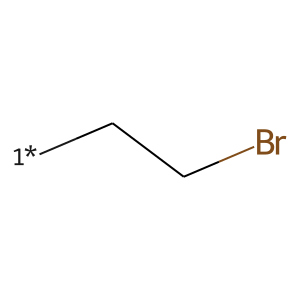

In [18]:
Draw.MolToImage(rs[0])

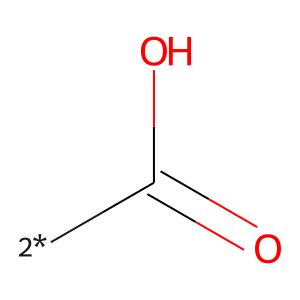

In [19]:
Draw.MolToImage(rs[1])

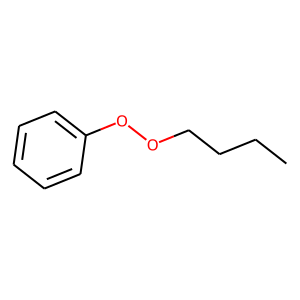

In [20]:
from rdkit.Chem.Scaffolds import MurckoScaffold
m = Chem.MolFromSmiles("c1ccccc1OOCCCC")
Draw.MolToImage(m)

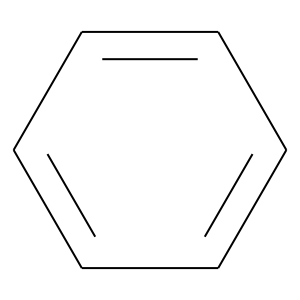

In [21]:
# with Chem.SDMolSupplier('data/cdk2.sdf') as cdk2mols:
#     m1 = cdk2mols[0]
# core = MurckoScaffold.GetScaffoldForMol(m1)
core = MurckoScaffold.GetScaffoldForMol(m)
Chem.MolToSmiles(core)
Draw.MolToImage(core)

In [22]:
fw = MurckoScaffold.MakeScaffoldGeneric(core)
Chem.MolToSmiles(fw)

'C1CCCCC1'

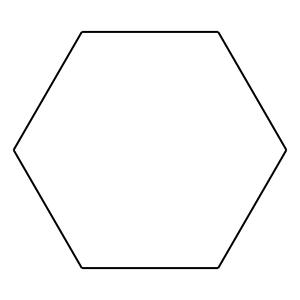

In [23]:
Draw.MolToImage(fw)

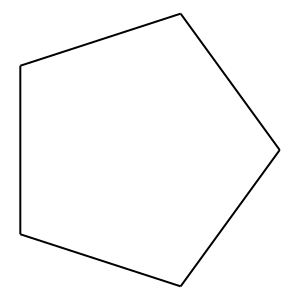

In [24]:
Draw.MolToImage(Chem.MolFromSmiles('C1CCCC1'))

In [25]:
def SmilesToMolAndImage(smiles):
    mol = Chem.MolFromSmiles(smiles)
    image = Draw.MolToImage(mol)
    return mol, image

In [26]:
def SmilesToImage(smiles):
    image = Draw.MolToImage(Chem.MolFromSmiles(smiles))
    return image

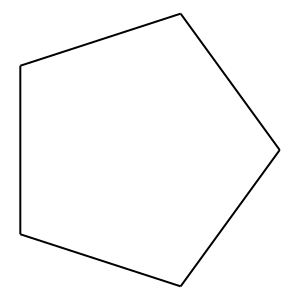

In [27]:
mol, image = SmilesToMolAndImage("C1CCCC1")
image

In [28]:
SmilesToMolAndImage("OO")

(<rdkit.Chem.rdchem.Mol at 0x7fefa88931c0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x7FEF891A8DC0>)

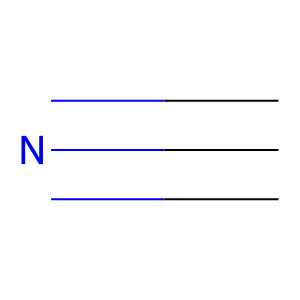

In [29]:
SmilesToImage("C#N")

In [30]:
from rdkit.Chem import rdFMCS
mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mol3 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1")
mols = [mol1, mol2, mol3]
res = rdFMCS.FindMCS(mols)
res.numAtoms, res.numBonds, res.smartsString, res.canceled

(10, 10, '[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]', False)

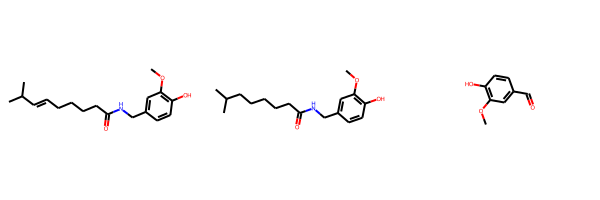

In [31]:
Draw.MolsToGridImage(mols)

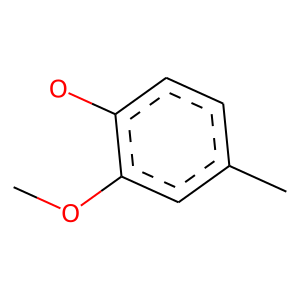

In [32]:
smart_mol = Chem.MolFromSmarts(res.smartsString)
Draw.MolToImage(smart_mol)

In [33]:
def SmilesMCStoImage(*smiles, **kwargs):
     mols = [Chem.MolFromSmiles(smile) for smile in smiles]
     res = rdFMCS.FindMCS(mols, **kwargs)
     mcs_mol = Chem.MolFromSmarts(res.smartsString)
     smarts = res.smartsString
     # print(f"{smarts=}")
     smart_mol = Chem.MolFromSmarts(smarts)
     # smarts = Draw.MolToImage(smart_mol)
     smarts_and_mols = [smart_mol] + mols
     # print(f"{mols[0]=}")
     # print(f"{mols[0].GetSubstructMatch(mcs_mol)=}")
    
     matches = [""] + [mol.GetSubstructMatch(mcs_mol) for mol in mols]
     # matches = [mol.GetSubstructMatch(mcs_mol) for mol in mols]

     p = Chem.MolFromSmiles(smiles[0])
     # subms = [x for x in mols if x.HasSubstructMatch(p)]
     subms = [x for x in smarts_and_mols if x.HasSubstructMatch(p)]
     # print(f"{len(subms)=}")

     Chem.Compute2DCoords(p)
     for m in subms:
          _ = AllChem.GenerateDepictionMatching2DStructure(m, p)

     return Draw.MolsToGridImage(smarts_and_mols, highlightAtomLists=matches)
     # return Draw.MolsToGridImage(mols, highlightAtomLists=matches)

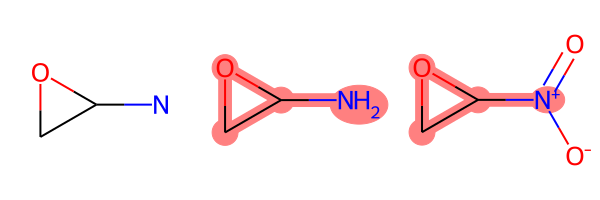

In [34]:
SmilesMCStoImage("NC1OC1", "C1OC1[N+](=O)[O-]")

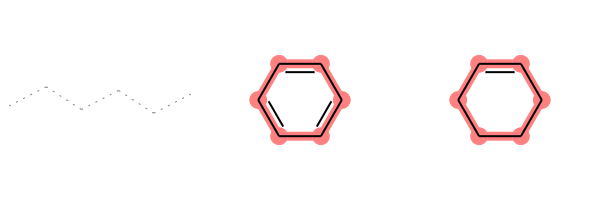

In [35]:
SmilesMCStoImage("c1ccccc1", "C1CCCC=C1")

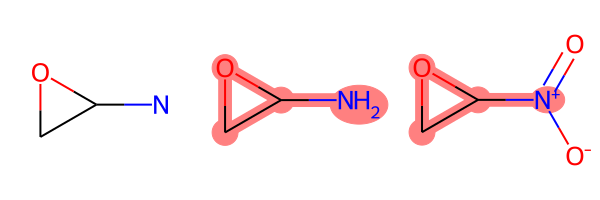

In [36]:
SmilesMCStoImage("NC1OC1", "C1OC1[N+](=O)[O-]")

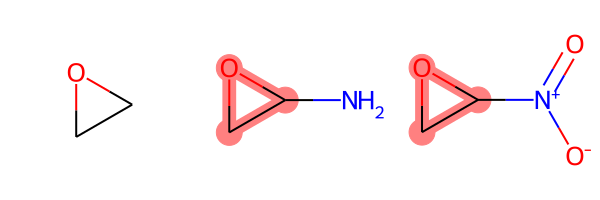

In [37]:
SmilesMCStoImage("NC1OC1", "C1OC1[N+](=O)[O-]", matchValences=True)

In [39]:
from rdkit import DataStructs
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]
fps = [Chem.RDKFingerprint(x) for x in ms]
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.6

In [40]:
DataStructs.FingerprintSimilarity(fps[0],fps[1], metric=DataStructs.DiceSimilarity)

0.75

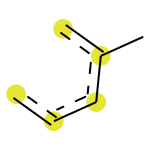

In [42]:
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
bi[872]
# ((6, 2),)
mfp2_svg = Draw.DrawMorganBit(mol, 872, bi, useSVG=True)
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi)
rdkbi[1553]
# [[0, 1, 9, 5, 4], [2, 3, 4, 9, 5]]
Draw.DrawRDKitBit(mol, 1553, rdkbi, useSVG=True)

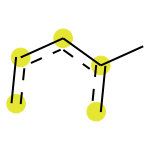

In [44]:
Draw.DrawRDKitBit(mol, 1553, rdkbi, whichExample=1, useSVG=True)

## [Descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#descriptor-calculation)

In [45]:
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
Descriptors.TPSA(m)

37.3

In [46]:
AllChem.ComputeGasteigerCharges(m)
m.GetAtomWithIdx(0).GetDoubleProp('_GasteigerCharge')

-0.04769375004654255

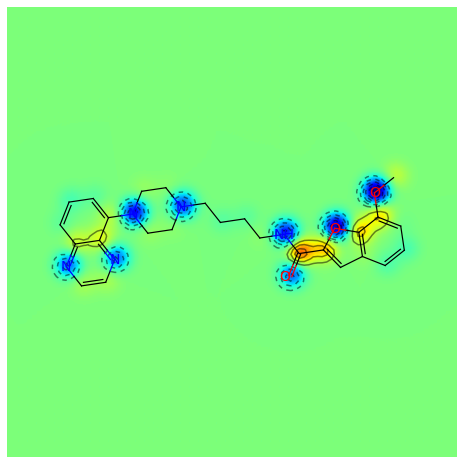

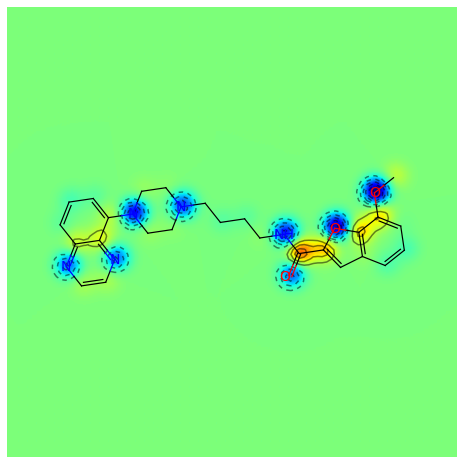

In [48]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

## [Chemical Reactions](https://www.rdkit.org/docs/GettingStartedInPython.html#chemical-reactions)

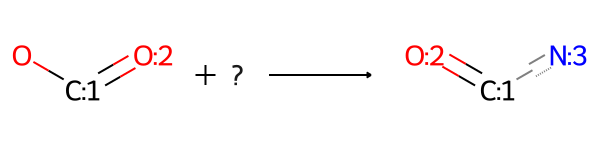

In [49]:
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]')
rxn

In [51]:
rxn.GetNumProductTemplates()

1

In [53]:
ps = rxn.RunReactants((Chem.MolFromSmiles('CC(=O)O'), Chem.MolFromSmiles('NC')))

In [55]:
a = Chem.MolToSmiles(ps[0][0])
a

'CNC(C)=O'

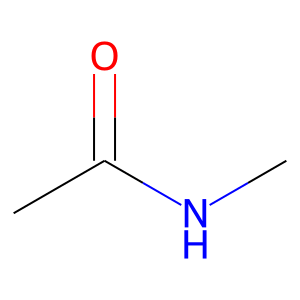

In [57]:
Draw.MolToImage(ps[0][0])

#Improve: Unclear what reaction(s) this sequence of commands is depicting

#Improve: Make files available, e.g. by making the accessible from URLs, or at least by making them downloadable (e.g., let user download files for entire tutorial at once)

### [Drawing Chemical Reactions](https://www.rdkit.org/docs/GettingStartedInPython.html#drawing-chemical-reactions)

In [74]:
from rdkit.Chem import Draw
rxn = AllChem.ReactionFromSmarts('[cH:5]1[cH:6][c:7]2[cH:8][n:9][cH:10][cH:11][c:12]2[c:3]([cH:4]1)[C:2](=[O:1])O.[N-:13]=[N+:14]=[N-:15]>C(Cl)Cl.C(=O)(C(=O)Cl)Cl>[cH:5]1[cH:6][c:7]2[cH:8][n:9][cH:10][cH:11][c:12]2[c:3]([cH:4]1)[C:2](=[O:1])[N:13]=[N+:14]=[N-:15]',useSmiles=True)
d2d = Draw.MolDraw2DCairo(800, 300)
d2d.DrawReaction(rxn)
png = d2d.GetDrawingText()
# open('./images/reaction1_highlight.o.png','wb+').write(png)
open('reaction1.o.png','wb+').write(png)

22536

#Improve: The given command `open('./images/reaction1_highlight.o.png','wb+').write(png)` assumes you have folder with that name already; should write directly to current folder

#Improve: Even better, write directly to the screen, not to a PNG file that has to be opened

In [81]:
d2d_highlight = Draw.MolDraw2DCairo(800, 300)
d2d_highlight.DrawReaction(rxn,highlightByReactant=True)
png_highlight = d2d_highlight.GetDrawingText()
open('reaction1_highlight.o.png','wb+').write(png_highlight)

24430

In [82]:
newRxn = AllChem.ReactionFromPNGString(png)
AllChem.ReactionToSmarts(newRxn)

'[#6H:5]1:[#6H:6]:[#6:7]2:[#6H:8]:[#7:9]:[#6H:10]:[#6H:11]:[#6:12]:2:[#6:3](:[#6H:4]:1)-[#6:2](=[#8:1])-[#8].[#7-:13]=[#7+:14]=[#7-:15]>[#6](-[#17])-[#17].[#6](=[#8])(-[#6](=[#8])-[#17])-[#17]>[#6H:5]1:[#6H:6]:[#6:7]2:[#6H:8]:[#7:9]:[#6H:10]:[#6H:11]:[#6:12]:2:[#6:3](:[#6H:4]:1)-[#6:2](=[#8:1])-[#7:13]=[#7+:14]=[#7-:15]'

### [Advanced Reaction Functionality](https://www.rdkit.org/docs/GettingStartedInPython.html#advanced-reaction-functionality)